## Orthogonal Cellular Automata

Automata based on bidimensional grid of square cells, each of which is in
one of two possible states. Every cell interacts with the neighbours,
located on a rectangular grid for the dimensions to chose. 

In this example, we will generate a grid of neighbours that evolves in a
unique vertical direction.
```
    _________________________________________ 
   |     |     |     |     |     |     |     |
   |+1,-3|+1,-2|+1,-1|+1,0 |+1,+1|+1,+2| 0,+3|
   |-----|-----|-----|-----|-----|-----|-----|
   | 0,-3| 0,-2| 0,-1| 0,0 | 0,+1| 0,+2| 0,+3|
   |_____|_____|_____|_____|_____|_____|_____|
```

In [1]:
import ndautomata as ca
import matplotlib.pyplot as plt
import cupy as np
from matplotlib.animation import FuncAnimation
from ndautomata import initializers, neighbours

Using the abstract class `ndautomata.BaseAutomaton` we generate the 2D `Automaton` class defining a regular array of 2 dimension index. To generate the neighbours, we select an orthogonal grid of 2x7 cells. The number of possible states is set to 2, similar to Elementary automata.

In [2]:
class Automaton(ca.BaseAutomaton):
    neighbours = neighbours.orthogonal([2, 7])
    states = 2

In this example, we will generate a Generic rule for our cellular automata evolution. To do so, as first step, it is required to generate a connections array space for a rule function with 14 arguments, one for the cell state and thirteen for the neighbours:

$$a{_{i,j}^{t+1}} = \phi \begin{bmatrix} a{_{i,j-3}^{t}}, & ... & a{_{i+1,j+3}^{t}} \end{bmatrix}$$

To generate the rule based on Generic terms, we can generate a base zero array and set individual values, or just call the random initializer to generate a full random rule.

In [3]:
connections = [Automaton.states] * Automaton.neighbours.size
rule = initializers.random(states=Automaton.states, size=connections)

Once the rule is set, an automata instance can be generated. To do so, we use again the `initializers` module to generate the initial conditions. In this example, we start with a unique active state *1* located at the center of the 2 dimension board. All the rest of cells start with the value *0*.

In [4]:
ic = initializers.center(states=Automaton.states, size=[80, 120])
automaton = Automaton(ic, rule)

Finally, with the help of `matplotlib` we can generate the rule space-time animation. In this animation, each point of pixels shows the cells of the automaton at a single point in time, with time increasing during the animation.

In [5]:
# Enable interactive plot
%matplotlib widget
plt.rcParams["image.cmap"] = "binary"
plt.rcParams["animation.html"] = "jshtml"

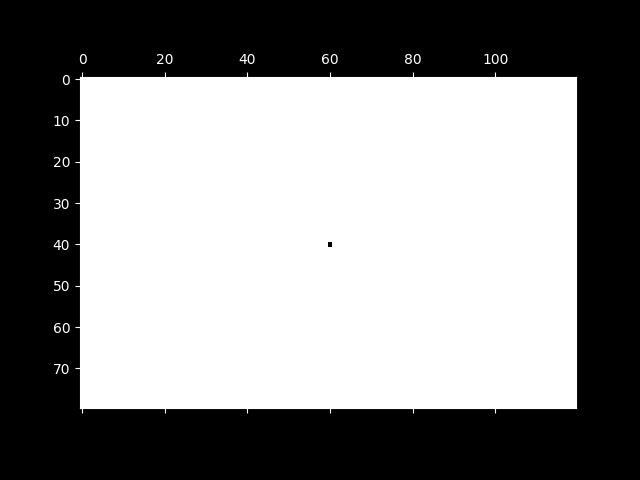

In [6]:
fig, ax = plt.subplots()
im = plt.matshow(automaton.configuration.get(), fignum=0)
animate = lambda *args: im.set_data(next(automaton).get())
anim = FuncAnimation(fig, animate)

Performance time is around `2.4s` for `10000` cycles on a `NVIDIA GeForce RTX 3070`.